<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/10_HandwrittenDigits_Manifold_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the relationship between high-dimensional data points using manifold learning

* Manifold learning is often used is in understanding the relationship between high-dimensional data points.
* A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.
    
 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.datasets import load_digits

### Load, explore data
* 1797 images with 64 pixels.
* The images can be thought of as data points in a 64-dimensional space.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

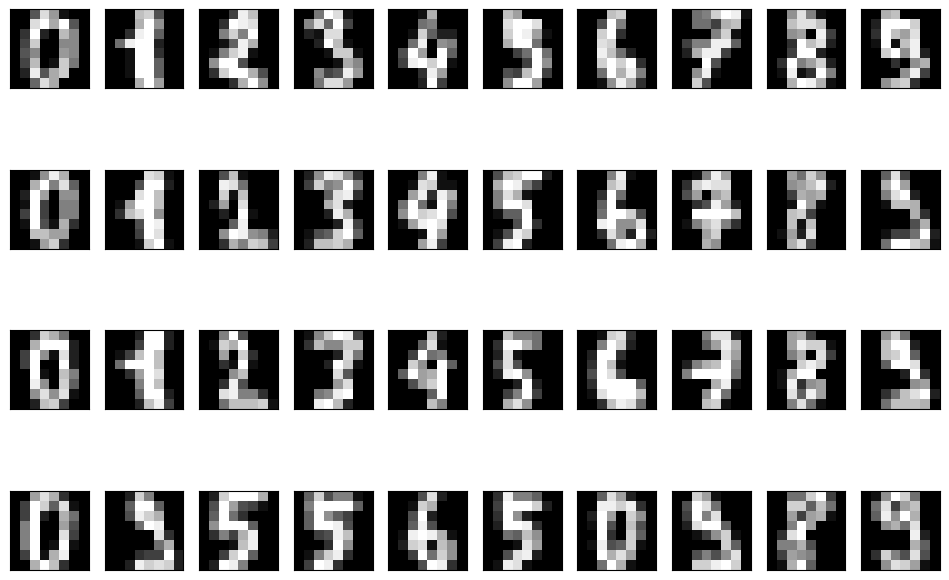

In [4]:
fig, ax = plt.subplots(4, 10, figsize = (12, 8), subplot_kw = dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow( digits.images[i], cmap = 'gray')

In [5]:
X = digits.data

y = digits.target

In [6]:
X.shape

(1797, 64)

In [7]:
pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1737,0.0,0.0,11.0,15.0,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,16.0,13.0,1.0,0.0,0.0
27,0.0,0.0,0.0,8.0,14.0,14.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,13.0,1.0,0.0,0.0
881,0.0,0.0,2.0,14.0,13.0,8.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,2.0,10.0,15.0,16.0,2.0,0.0
260,0.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,9.0,0.0,0.0,0.0
1482,0.0,0.0,2.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,7.0,0.0
810,0.0,0.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,4.0,15.0,16.0,13.0,2.0,0.0
1442,0.0,0.0,1.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,2.0,0.0,0.0,0.0
785,0.0,0.0,5.0,11.0,13.0,3.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,6.0,13.0,16.0,16.0,6.0,0.0
706,0.0,1.0,7.0,13.0,16.0,11.0,0.0,0.0,0.0,11.0,...,8.0,0.0,0.0,0.0,7.0,16.0,12.0,7.0,0.0,0.0
993,0.0,0.0,3.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,4.0,10.0,16.0,16.0,4.0,0.0


In [8]:
y.shape

(1797,)

In [ ]:
pd.DataFrame(y).sample(10)

,0
1098,5
1508,1
1249,9
778,2
1106,0
839,3
1716,0
53,8
945,8
1041,2


### Find principle components
* RandomizedPCA: Principal component analysis (PCA) using randomized SVD

In [9]:
from sklearn.decomposition import PCA

model = PCA(50).fit(X)

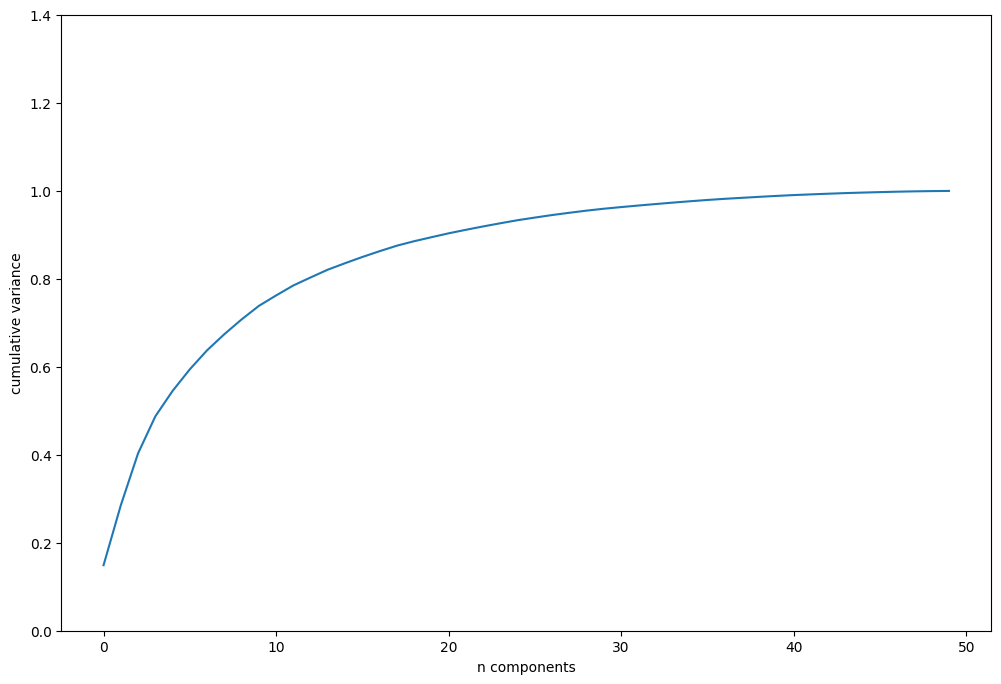

In [10]:
plt.figure( figsize = (12, 8))
plt.plot(np.cumsum(model.explained_variance_ratio_ ))

pylab.ylim([0, 1.4])

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [12]:
classes = list(range(10))
target_names = digits.target_names

def apply_manifold_learning(X, y, method):

    X = method.fit_transform(X)

    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X).sample(10))
    print()

    fig, ax = plt.subplots(figsize = (12, 8))
    for i, target_name in zip(classes, target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1],
                    label = target_name,
                    cmap = plt.cm.Spectral, s=100)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2');

    plt.legend()
    plt.show()

    return method

### Apply MDS

* More than 50 components are required to preserve 90% of the variance
* The data is intrinsically very high dimensional
* It can't be described linearly with just a few components.

* When this is the case, nonlinear manifold embeddings can be used to get a two-dimensional projection of all the input images
* Apply mds to get two components
* n_init : Number of times the SMACOF algorithm will be run with different initializations. The final results will be the best output of the runs, determined by the run with the smallest final stress.
* max_iter : Maximum number of iterations of the SMACOF algorithm for a single run.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


New shape of X :  (1797, 2)

Sample X : 

             0         1
1456 -0.530358  0.089324
29    0.152874  0.281268
988   0.534310 -0.117508
70   -0.297440  0.202289
1742 -0.230271  0.676772
626   0.273835  0.324242
613  -0.321271 -0.087758
1310  0.569023  0.577938
630   0.448950  0.242866
1159 -0.474914  0.210828



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


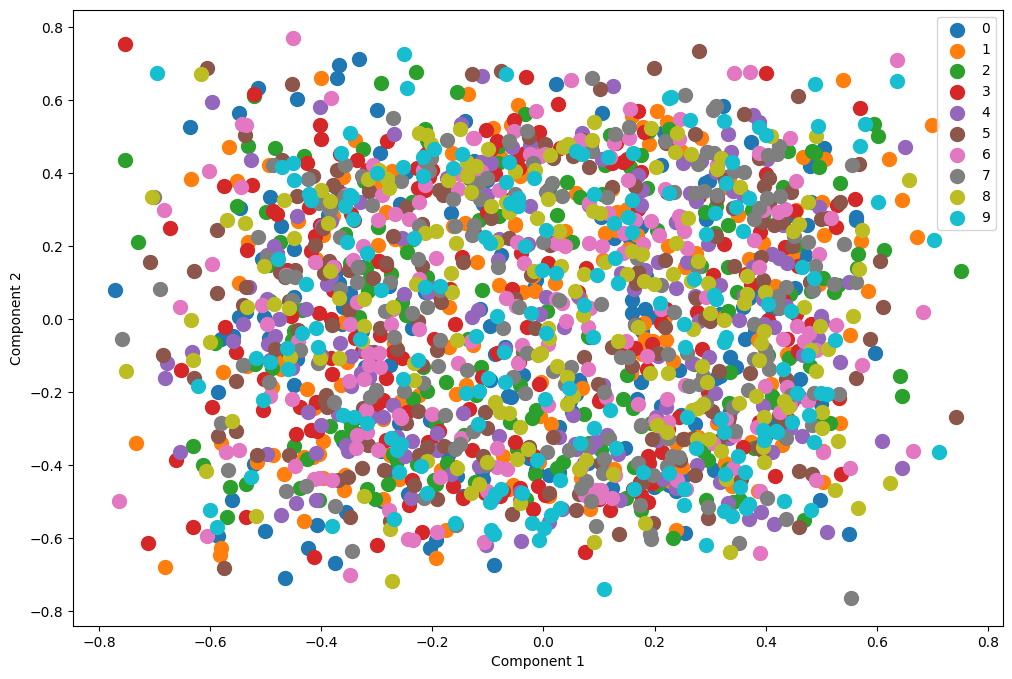

In [13]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, y,
      MDS(n_components = 2, metric = False, n_init = 1, max_iter = 100))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


New shape of X :  (1797, 2)

Sample X : 

              0          1
1607  13.747018  33.134971
31    39.196876 -15.984886
901   21.148047   8.543322
738   18.348174 -37.096204
465  -15.009561  22.144665
6     -5.252319  31.226123
290   -1.829104  32.085930
554   11.655013  19.117102
1127 -35.216024  18.029076
322   -5.136628  31.909119



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


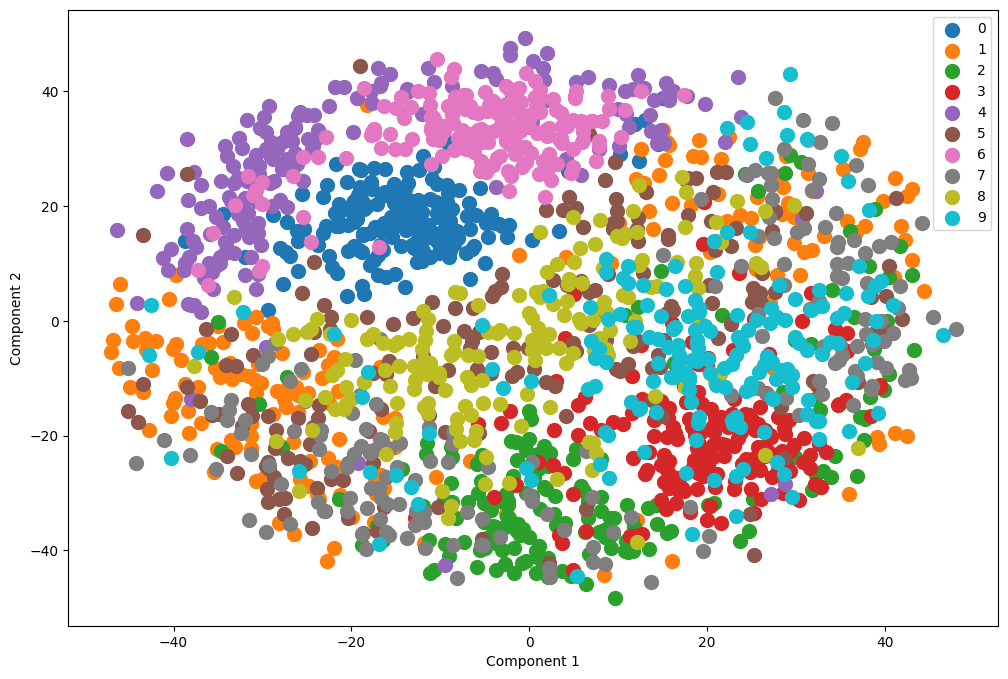

In [14]:
mds = apply_manifold_learning(X, y,
      MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100))

## Isomap

New shape of X :  (1797, 2)

Sample X : 

              0          1
1294 -90.931827  11.570390
1385  15.996107 -52.994669
71    -1.718286   8.960147
234   64.811150  11.414980
933    5.490551 -33.739981
1148   9.595749  61.524591
1460  -1.702019 -55.117497
1143 -18.397251 -45.459243
1748 -68.715738  37.545368
1451  79.834167  -4.319948



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


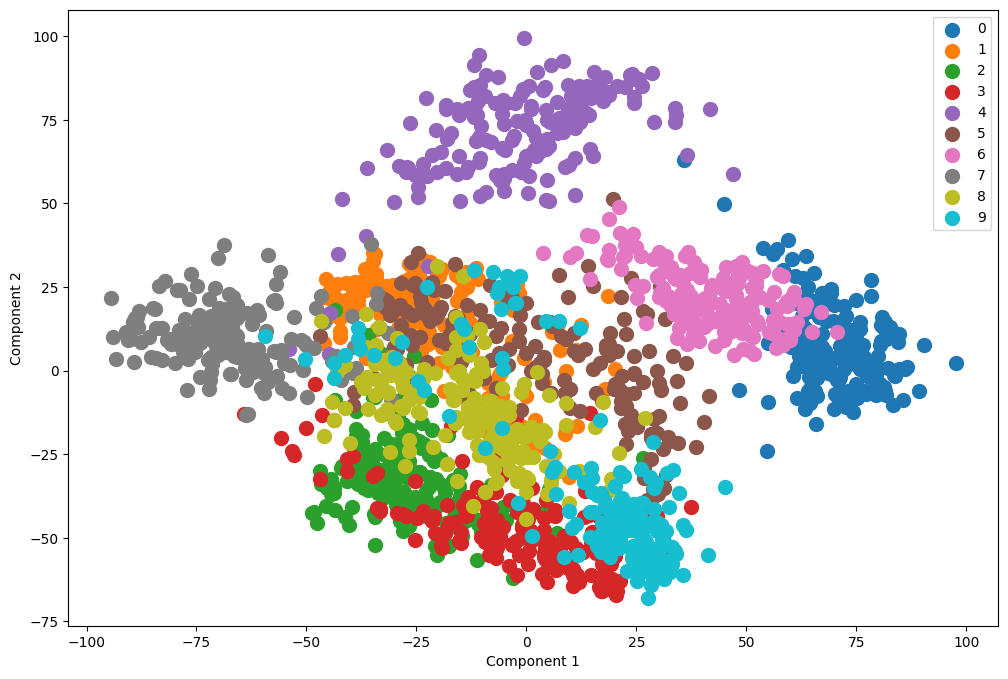

In [15]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, y, Isomap(n_neighbors = 30, n_components = 2))

### Apply LLE

New shape of X :  (1797, 2)

Sample X : 

             0         1
1094  0.024031 -0.012581
1531  0.004251  0.014359
1362  0.010086  0.012537
1141 -0.032041 -0.032404
526   0.010173  0.001794
913   0.009982 -0.035883
1390 -0.009025 -0.005906
807  -0.006291 -0.002687
1003  0.004645 -0.007052
185   0.004602  0.002442



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


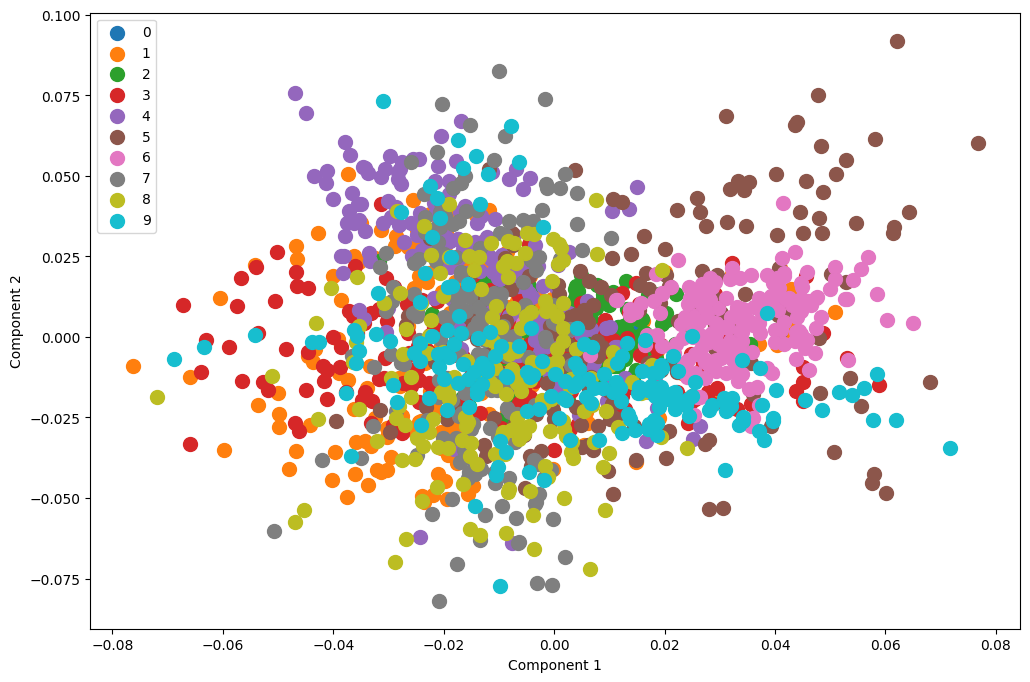

In [16]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'standard'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
1363 -0.009242  0.001906
1179 -0.011842  0.008013
1100 -0.009288  0.009792
1607 -0.007300  0.010501
1429 -0.005157  0.007135
1278 -0.002940  0.005429
1201 -0.013034  0.019901
996  -0.004666 -0.075046
188  -0.005548 -0.072099
1129 -0.008143 -0.000050



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


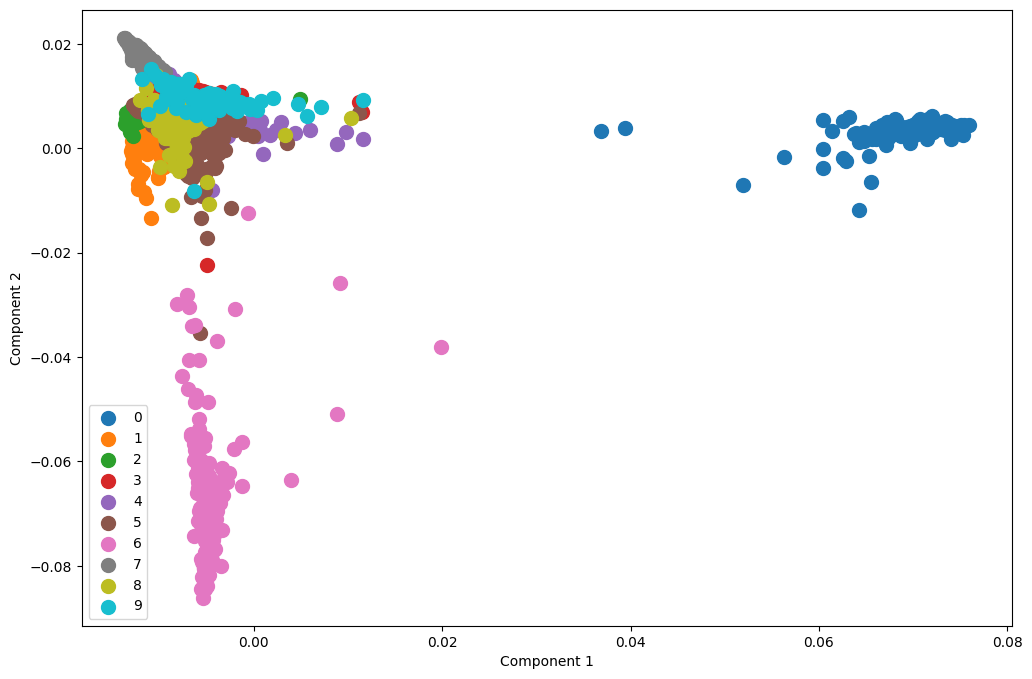

In [17]:
lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'modified'))

### Apply HLLE

New shape of X :  (1797, 2)

Sample X : 

             0         1
432   0.006794  0.007754
1757  0.009874  0.005738
1535  0.004863  0.005412
197   0.006352 -0.072822
38    0.009928  0.008666
152   0.010745  0.010906
103   0.009652  0.011070
493   0.008103  0.006620
1591 -0.057277 -0.004668
0    -0.071777  0.003650



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


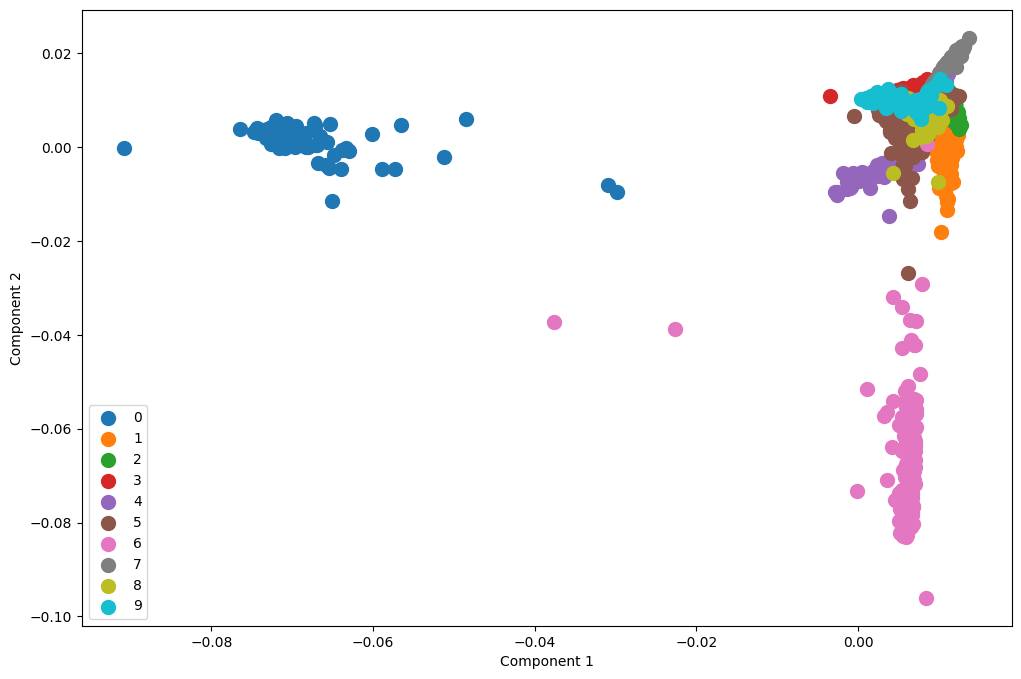

In [18]:
hlle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'hessian'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
541   0.000149 -0.001961
1699 -0.000334 -0.000344
1298 -0.001179  0.000983
1154 -0.001425  0.000216
443  -0.001482 -0.001298
576  -0.000610 -0.002382
1417 -0.001576 -0.000603
1483  0.000367  0.002676
1707 -0.001313  0.000186
1295 -0.001242  0.000527



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


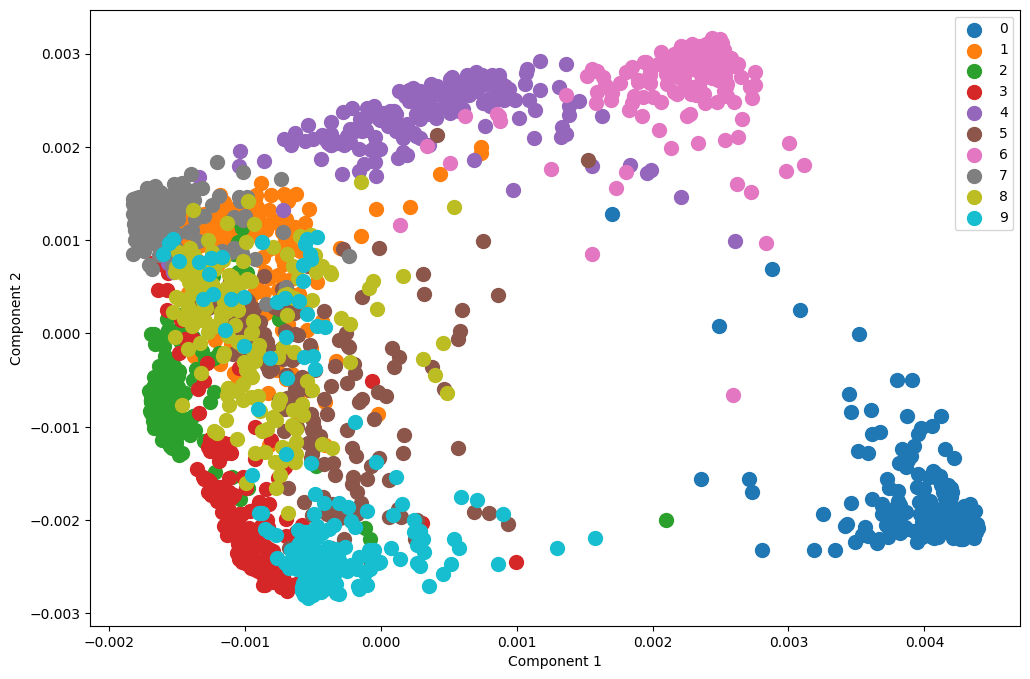

In [19]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, y, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

New shape of X :  (1797, 2)

Sample X : 

              0          1
1453 -13.978308   1.272319
529  -26.492853   2.193335
1159 -26.197552 -35.180820
475  -33.801693   7.962068
686  -11.906816  -2.556529
716    1.385658  -8.541578
1331   6.469618 -41.936825
1188 -20.362215  20.355616
1696 -27.957979  18.668938
682    4.708819  57.499687



<ipython-input-12-bb4064cd1dd7>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1],


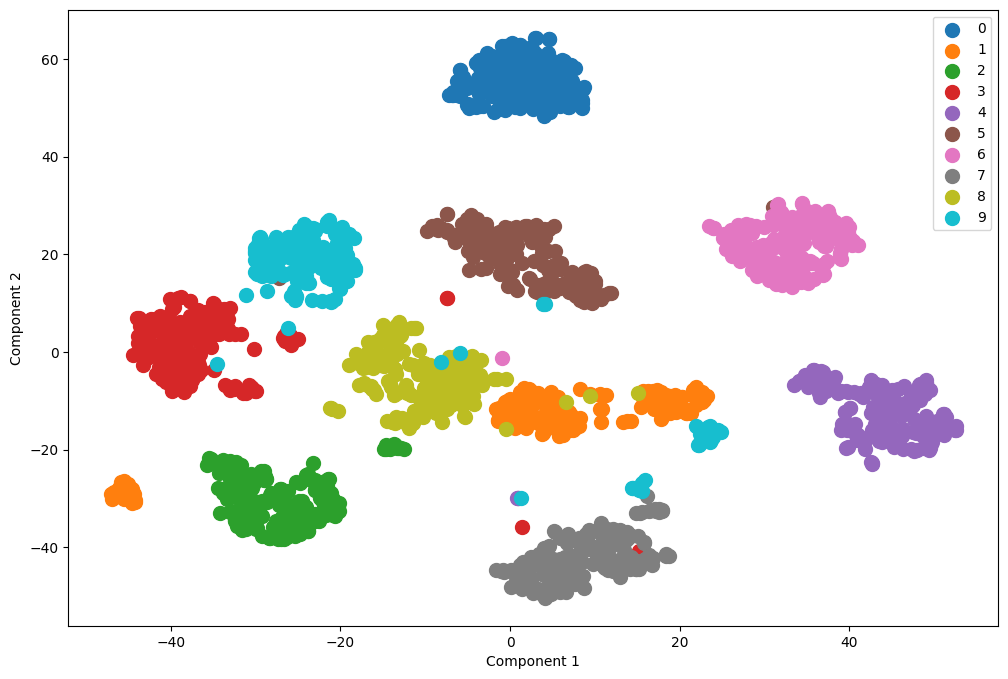

In [20]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, y, TSNE(n_components = 2, init = 'pca', random_state = 0))